In [19]:
# Import libraries
import SimpleITK as sitk
from radiomics import featureextractor
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.cm as cm
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

In [4]:
# Import data
features = pd.read_csv(r"/Users/ilanadeutsch/Desktop/features.csv")

feature_names = []

for column in features:
    if column != "Case":
       # if "original" in column:
        #    feature_names.append(column.removeprefix("original_"))
        #else:
              feature_names.append(column)

In [12]:
samples = np.zeros((np.shape(features)[0],len(feature_names)))
for rowNum, case in enumerate(features["Case"]):
    a = np.array([])
    for columnNum, feature_name in enumerate(feature_names):
        a = np.append(a, features.iloc[rowNum,columnNum+1])
    samples[rowNum-1,:] = a

#May have NaNs
samples = np.nan_to_num(samples)

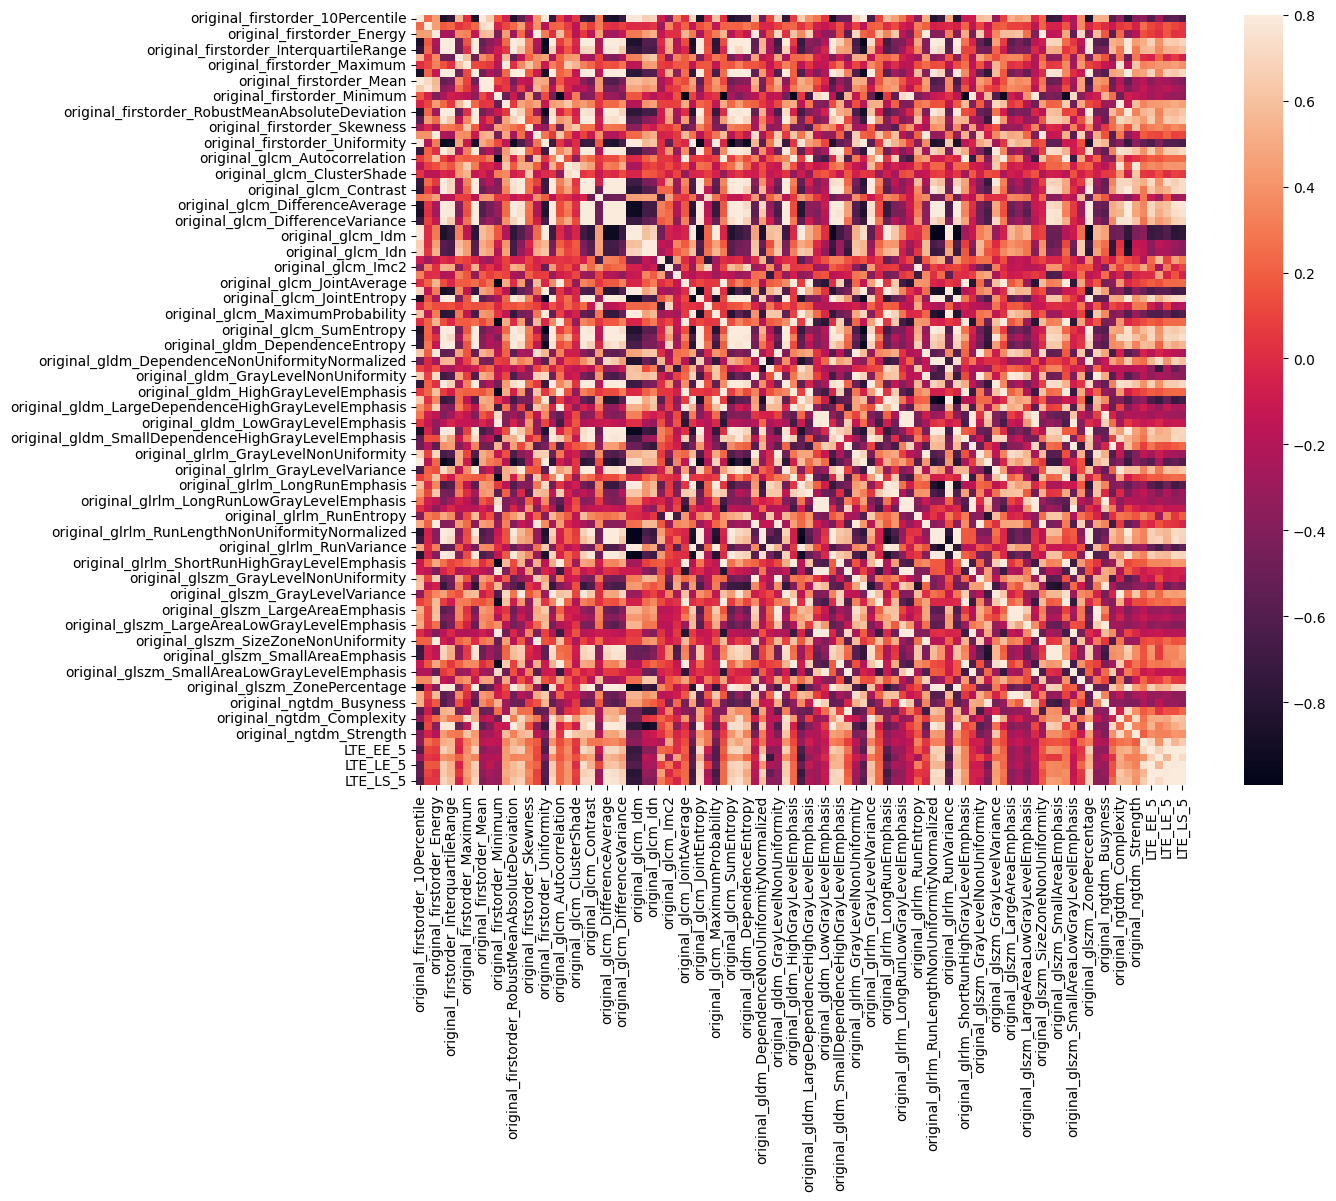

In [23]:
# Construct a pandas dataframe from the samples
d = pd.DataFrame(data=samples, columns=feature_names)
corr = d.corr()

# Set up the matplotlib figure, make it big!
f, ax = plt.subplots(figsize=(15, 10))

# Draw the heatmap using seaborn
sns.heatmap(corr, vmax=.8, square=True)
plt.show()

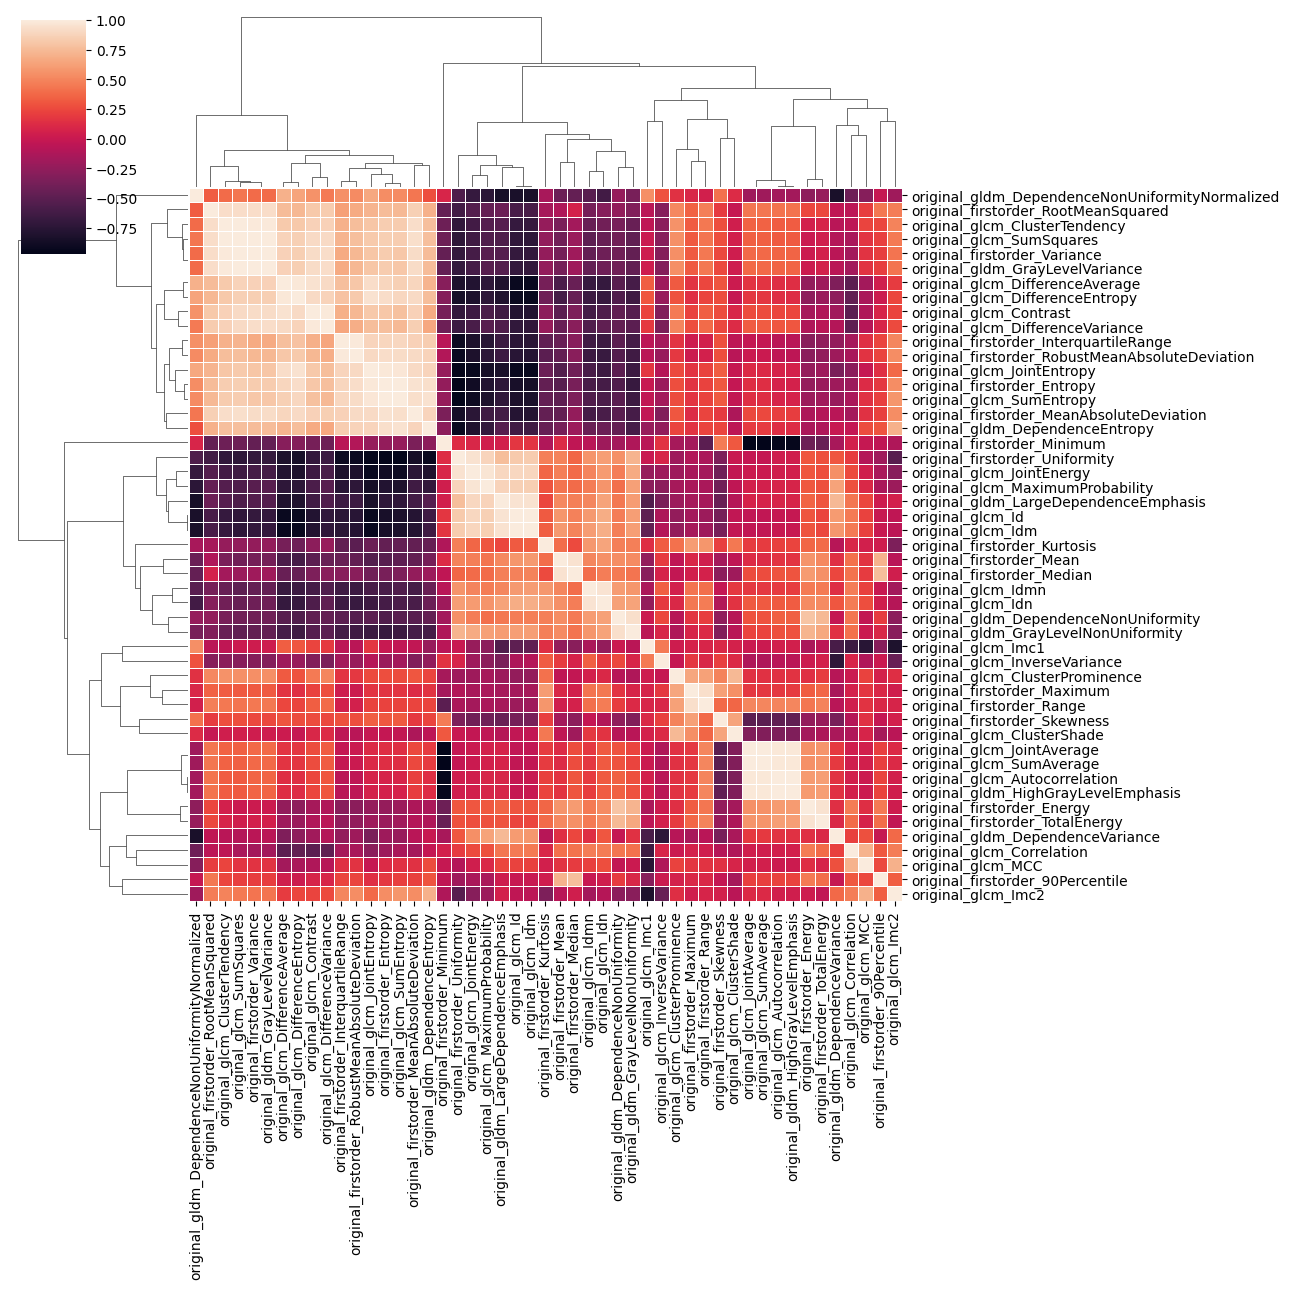

In [27]:
# Choose a subset of features for clustering
dd = d.iloc[:,1:50]

pp = sns.clustermap(dd.corr(), linewidths=.5, figsize=(13,13))
_ = plt.setp(pp.ax_heatmap.get_yticklabels(), rotation=0)

plt.show()